**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from joblib import dump, load

**Load Dataset**

In [4]:
df = pd.read_csv(r"D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv")

In [5]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Data Preprocessing**

In [6]:
df = df.drop(columns=['Stroke Risk (%)'])

In [7]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [8]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [9]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [10]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Resampling

In [12]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [43]:
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='logloss', random_state=42)
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 36336, number of negative: 36336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 72672, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(metric='logloss', objective='binary', random_state=42)

In [44]:
y_pred = lgbm.predict(X_test)

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print()

Accuracy: 0.9799285714285715

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4892
           1       0.98      0.98      0.98      9108

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


Confusion Matrix:
[[4752  140]
 [ 141 8967]]



**Hyperparameter Tuning**

In [46]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63]
}

grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 36336, number of negative: 36336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 72672, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=5,
             estimator=LGBMClassifier(metric='logloss', objective='binary',
                                      random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='roc_auc', verbose=2)

In [47]:
print(f"Best Params:\n{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Estimator: {grid_search.best_estimator_}")

Best Params:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 15}
Best Score: 0.999917288705998
Best Estimator: LGBMClassifier(max_depth=5, metric='logloss', n_estimators=200, num_leaves=15,
               objective='binary', random_state=42)


In [48]:
best_params = grid_search.best_params_
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']
best_num_leaves = best_params['num_leaves']

**Retraining with Optimal Parameters**

In [50]:
lgbm_pipe = Pipeline([
    ('lgbm', LGBMClassifier(
        boosting_type = 'gbdt',
        objective = 'binary',
        metric = 'logloss',
        random_state = 42,
        learning_rate = best_learning_rate,
        max_depth = best_max_depth,
        n_estimators = best_n_estimators,
        num_leaves = best_num_leaves
    ))
])

In [51]:
lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 36336, number of negative: 36336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 72672, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('lgbm',
                 LGBMClassifier(max_depth=5, metric='logloss', n_estimators=200,
                                num_leaves=15, objective='binary',
                                random_state=42))])

In [52]:
y_pred_2 = lgbm_pipe.predict(X_test)

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**Optimized Model Performance**

In [53]:
print("===== Optimalized Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print()

===== Optimalized Model Performance =====
Accuracy: 0.9952142857142857

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4892
           1       0.99      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      0.99      0.99     14000
weighted avg       1.00      1.00      1.00     14000


Confusion Matrix:
[[4845   47]
 [  20 9088]]



**Blind Test**

In [54]:
new_data = scaler.transform([[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 54]]) # Stroke

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
y_blind = lgbm.predict(new_data)
print(y_blind)

[1]


c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [55]:
y_blind = lgbm_pipe.predict(new_data)
print(y_blind)

[1]


c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**Saving Model**

In [57]:
# Saving Model
dump(lgbm_pipe, 'model.joblib')

['model.joblib']

In [14]:
# Loading Saved Model
loaded_model = load('model.joblib')
loaded_scaler = load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [18]:
print("===== Loaded Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded_model)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_loaded_model)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_loaded_model)}")
print()

===== Loaded Model Performance =====
Accuracy: 0.9952142857142857

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4892
           1       0.99      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      0.99      0.99     14000
weighted avg       1.00      1.00      1.00     14000


Confusion Matrix:
[[4845   47]
 [  20 9088]]



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred_loaded_model))
print(recall_score(y_test, y_pred_loaded_model))
print(f1_score(y_test, y_pred_loaded_model))
print(accuracy_score(y_test, y_pred_loaded_model))

0.9948549534756431
0.9978041282389108
0.9963273584388532
0.9952142857142857


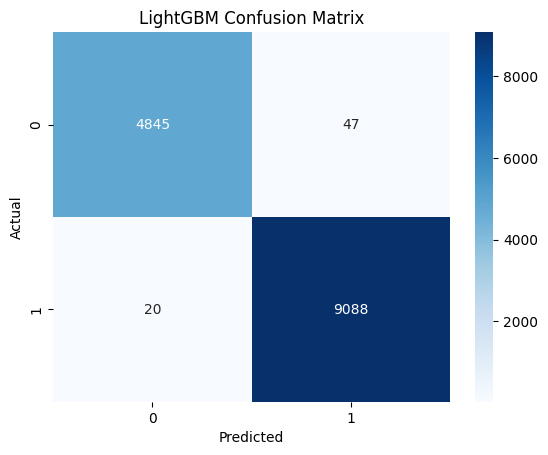

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()